In [33]:
pip install pm4py

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [36]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
import pandas as pd
import pm4py

if __name__ == "__main__":
    dataframe = pd.read_csv('event_log_s.txt', sep=',')
    dataframe = dataframe.rename(columns={'productID': 'case:productID'})
    dataframe = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity_id', timestamp_key='time_stamp')
    event_log = pm4py.convert_to_event_log(dataframe)

In [38]:
event_log

[{'attributes': {'concept:name': '0'}, 'events': [{'case_id': 0, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 09:30:45+0000', tz='UTC'), 'product_id': 0, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 09:30:45+0000', tz='UTC'), '@@index': 0}, '..', {'case_id': 0, 'activity_id': 6, 'time_stamp': Timestamp('2023-09-24 09:32:34+0000', tz='UTC'), 'product_id': 0, 'concept:name': '6', 'time:timestamp': Timestamp('2023-09-24 09:32:34+0000', tz='UTC'), '@@index': 6}]}, '....', {'attributes': {'concept:name': '99'}, 'events': [{'case_id': 99, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 09:47:15+0000', tz='UTC'), 'product_id': 99, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 09:47:15+0000', tz='UTC'), '@@index': 1515}, '..', {'case_id': 99, 'activity_id': 9, 'time_stamp': Timestamp('2023-09-24 10:03:14+0000', tz='UTC'), 'product_id': 99, 'concept:name': '9', 'time:timestamp': Timestamp('2023-09-24 10:03:14+0000', tz='UTC'), '@@index': 1520}]}]

In [39]:
## Printing the first trace
event_log[10]  

{'attributes': {'concept:name': '107'}, 'events': [{'case_id': 107, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 09:48:35+0000', tz='UTC'), 'product_id': 107, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 09:48:35+0000', tz='UTC'), '@@index': 63}, '..', {'case_id': 107, 'activity_id': 5, 'time_stamp': Timestamp('2023-09-24 10:08:03+0000', tz='UTC'), 'product_id': 107, 'concept:name': '5', 'time:timestamp': Timestamp('2023-09-24 10:08:03+0000', tz='UTC'), '@@index': 68}]}

In [40]:
## printing the first event in first trace
event_log[0][0] 

{'case_id': 0, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 09:30:45+0000', tz='UTC'), 'product_id': 0, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 09:30:45+0000', tz='UTC'), '@@index': 0}

In [41]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter

In [42]:
#Filter on case performance
filtered_log = pm4py.filter_case_performance(event_log, 0, 10)
filtered_log

[{'attributes': {'concept:name': '281'}, 'events': [{'case_id': 281, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 10:17:35+0000', tz='UTC'), 'product_id': 281, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 10:17:35+0000', tz='UTC'), '@@index': 974}, '..', {'case_id': 281, 'activity_id': 1, 'time_stamp': Timestamp('2023-09-24 10:17:40+0000', tz='UTC'), 'product_id': 281, 'concept:name': '1', 'time:timestamp': Timestamp('2023-09-24 10:17:40+0000', tz='UTC'), '@@index': 975}]}, '....', {'attributes': {'concept:name': '298'}, 'events': [{'case_id': 298, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 10:20:25+0000', tz='UTC'), 'product_id': 298, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 10:20:25+0000', tz='UTC'), '@@index': 1031}, '..', {'case_id': 298, 'activity_id': 7, 'time_stamp': Timestamp('2023-09-24 10:20:32+0000', tz='UTC'), 'product_id': 298, 'concept:name': '7', 'time:timestamp': Timestamp('2023-09-24 10:20:32+0000', tz='UTC'), '@@

In [43]:
# Printing the start activity in our log
log_start = start_activities_filter.get_start_activities(event_log)
log_start  

{'0': 299}

In [44]:
# Printing the end activity in our log
end_activities = end_activities_filter.get_end_activities(event_log)
end_activities  

{'6': 49, '9': 48, '5': 51, '3': 141, '1': 7, '7': 3}

In [45]:
#Before applying one of the many process mining algorithms, 
#it will be informatives if we get some statistics describing our
#log and process will start by understanding how many variants we have? how many cases in each variant?
#A process variant is a unique path from the very beginning to the very end of the process

from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics
variants = variants_filter.get_variants(event_log)
print(f"We have:{len(variants)} variants in our log")

We have:22 variants in our log


In [46]:
## Let's try to understand how many cases do those operations sequences variants have?

variants_count = case_statistics.get_variant_statistics(event_log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
variants_count[:10] ## Printing the top 10 variants by case number

[{'variant': '0,1,8,3', 'count': 40},
 {'variant': '0,1,2,3', 'count': 38},
 {'variant': '0,7,2,3', 'count': 34},
 {'variant': '0,7,8,3', 'count': 29},
 {'variant': '0,1,8,3,4,9', 'count': 15},
 {'variant': '0,7,2,3,4,5', 'count': 14},
 {'variant': '0,7,2,3,4,9', 'count': 13},
 {'variant': '0,1,8,3,4,5', 'count': 13},
 {'variant': '0,1,2,3,4,5', 'count': 13},
 {'variant': '0,1,2,3,4,9', 'count': 12}]

In [47]:
## Let's see what activities do we have in log? including their frequencies and considering all cases(no filter)

from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(event_log, "concept:name")
activities

{'0': 299,
 '7': 132,
 '2': 147,
 '3': 289,
 '4': 148,
 '9': 79,
 '6': 49,
 '5': 69,
 '1': 167,
 '8': 142}

## 1. Alpha Miner:
The starting point for the Alpha algorithm are ordering relations (sorted by timestamp ofc) So, we do not consider the frequencies nor we consider other attributes!

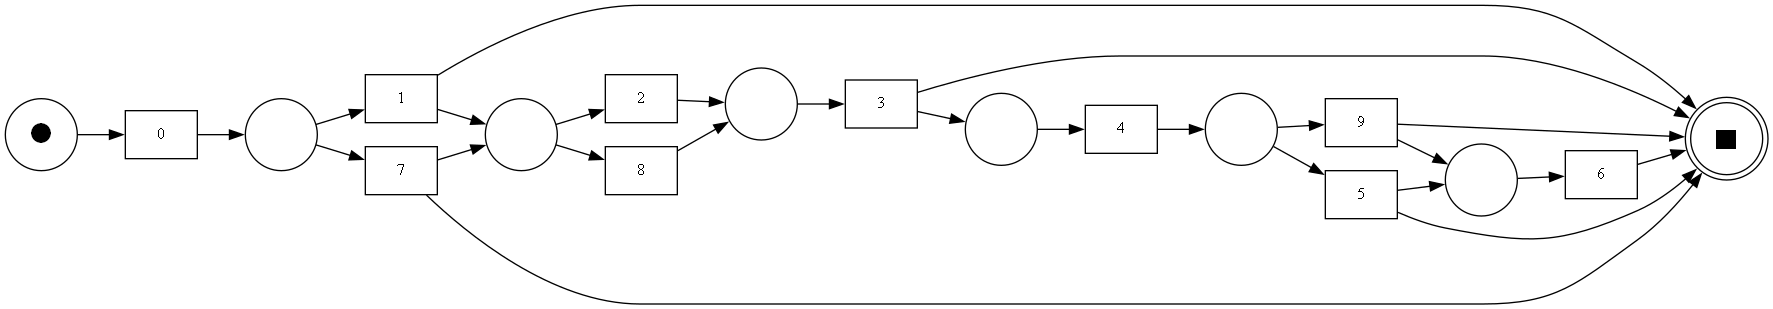

In [48]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
net, initial_marking, final_marking = alpha_miner.apply(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/22 [00:00<?, ?it/s]

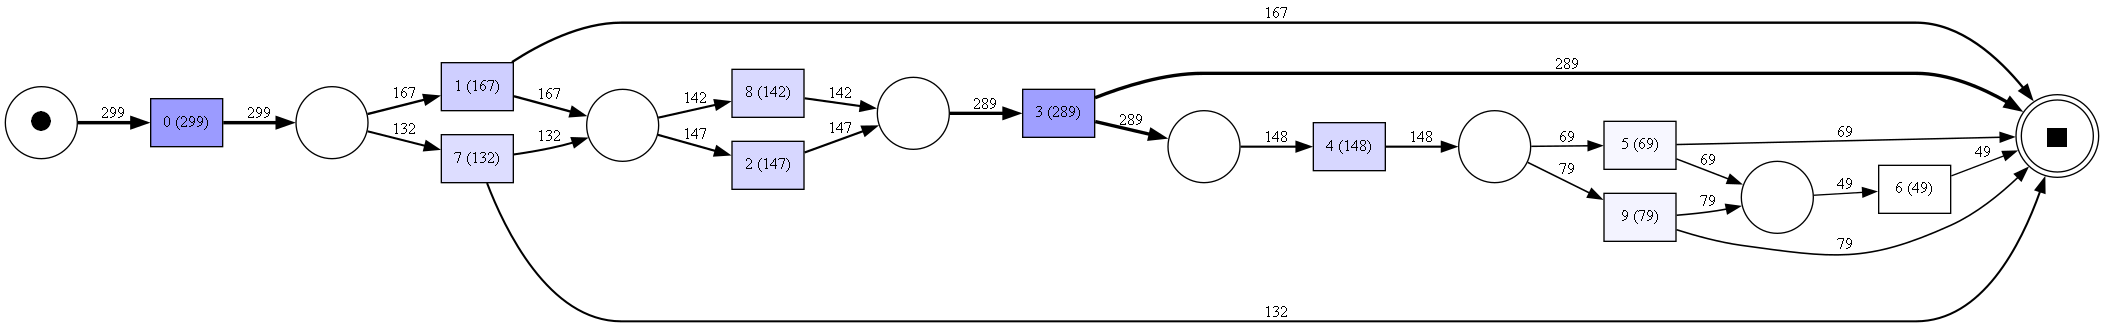

In [49]:
## Adding frequency

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)
pn_visualizer.view(gviz)

## 2. Inductive minner

As per PM4Py documentation, The basic idea of Inductive Miner is about detecting a 'cut' in the log (e.g. sequential cut, parallel cut, concurrent cut and loop cut) and then recur on sublogs, which were found applying the cut, until a base case is found. The Directly-Follows variant avoids the recursion on the sublogs but uses the Directly Follows graph

" * " is the loop, "->" is the sequence operator, "X" is the exclusive choice

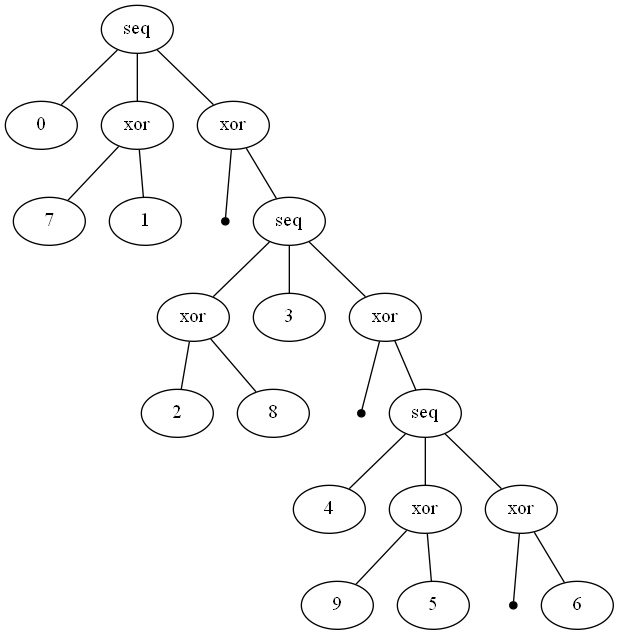

In [50]:
tree = inductive_miner.apply_tree(event_log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

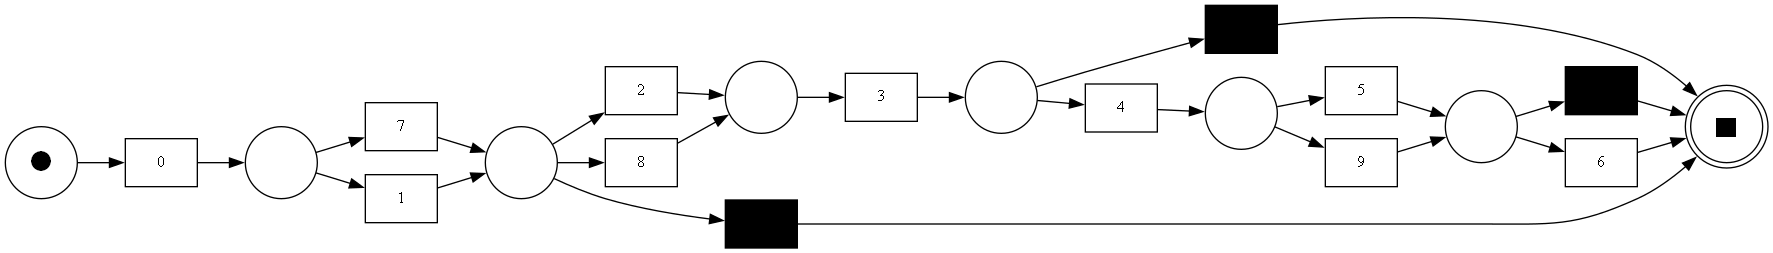

In [51]:
## In case you want to Convert the inductive miner into petri-net

net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## 3. Heuristic Miner
Heuristics Miner is an algorithm that acts on the Directly-Follows Graph. The output of the Heuristics Miner is an Heuristics Net

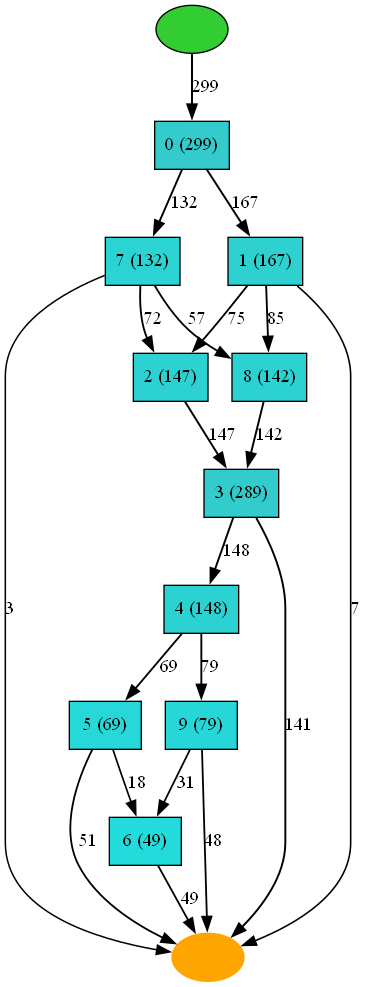

In [52]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.5})
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## 4. DFG - Direct flows graph with frequency and time between the edges

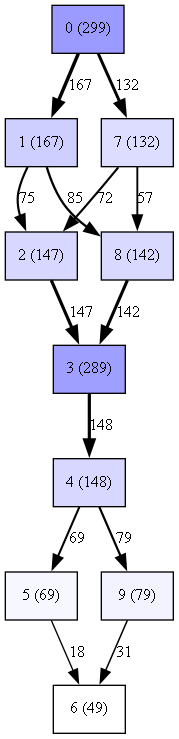

In [53]:
## First let's take the frequency:

dfg = dfg_discovery.apply(event_log)

from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

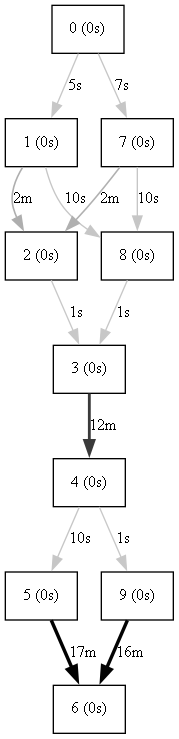

In [54]:
## Let's now take how much time it takes to travel between activities in our process

dfg = dfg_discovery.apply(event_log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

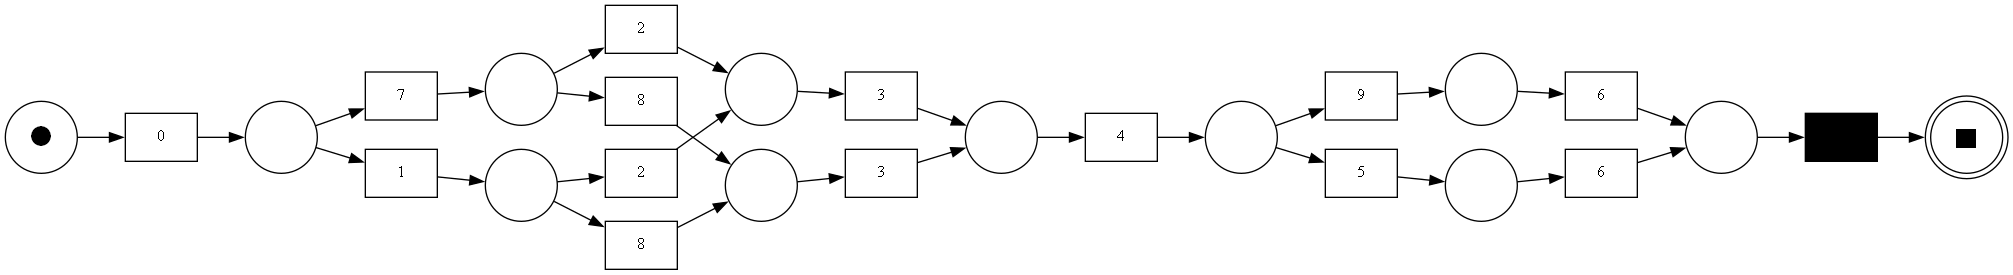

In [55]:
# Convert Directly-Follows Graph to a Workflow Net

from pm4py.objects.conversion.dfg import converter as dfg_mining
net, im, fm = dfg_mining.apply(dfg)
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [56]:
# Calculate all cases duration and describe
all_case_durations = pm4py.get_all_case_durations(event_log)
all_case_durations_min = [x / 60 for x in all_case_durations]
pd.Series(all_case_durations_min).describe()

count    299.000000
mean      10.056020
std       10.367119
min        0.083333
25%        0.316667
50%        3.800000
75%       18.300000
max       41.650000
dtype: float64

In [57]:
all_case_durations_min

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.11666666666666667,
 0.11666666666666667,
 0.11666666666666667,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3166666

In [58]:
# remove outliers (z_score) from all cases duration and describe
import numpy as np
import pandas as pd

def remove_outlier_z(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    data_2 = data_1
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            data_2.remove(y)
    return data_2

acd_min_outliers_z =remove_outlier_z(all_case_durations_min)
pd.Series(acd_min_outliers_z).describe()

count    298.000000
mean       9.950559
std       10.222640
min        0.083333
25%        0.316667
50%        3.725000
75%       18.262500
max       41.650000
dtype: float64

In [59]:
# remove outliers (iqr) from all cases duration and describe

def remove_outlier_iqr(data_1):
    q1, q3= np.percentile(data_1,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)     
    data_2 = data_1
    for y in data_1: 
        if np.abs(y) > upper_bound or np.abs(y) < lower_bound:
            data_2.remove(y)      
    return data_2

acd_min_outliers_iqr =remove_outlier_iqr(all_case_durations_min)
pd.Series(acd_min_outliers_iqr).describe()

count    298.000000
mean       9.950559
std       10.222640
min        0.083333
25%        0.316667
50%        3.725000
75%       18.262500
max       41.650000
dtype: float64

In [60]:
acd_min_outliers_iqr

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.11666666666666667,
 0.11666666666666667,
 0.11666666666666667,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3166666

## SCRATCH

In [61]:
case_arrival_ratio = pm4py.get_case_arrival_average(event_log)
case_arrival_ratio

10.0

In [62]:
from pm4py.statistics.traces.generic.log import case_arrival
case_dispersion_ratio = case_arrival.get_case_dispersion_avg(event_log, parameters={
        case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
case_dispersion_ratio

9.664429530201343

In [63]:
from pm4py.utils import get_properties
from pm4py.statistics.traces.cycle_time.log import get as cycle_time
cycle_time = cycle_time.apply(event_log, parameters={
        case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
cycle_time

0.0

In [64]:
import pm4py
from pm4py.statistics.rework.cases.log import get as cases_rework_get
if __name__ == "__main__":
    dictio = cases_rework_get.apply(event_log) 
dictio

{'0': {'number_activities': 7, 'rework': 0},
 '1': {'number_activities': 7, 'rework': 0},
 '10': {'number_activities': 7, 'rework': 0},
 '100': {'number_activities': 6, 'rework': 0},
 '101': {'number_activities': 6, 'rework': 0},
 '102': {'number_activities': 6, 'rework': 0},
 '103': {'number_activities': 6, 'rework': 0},
 '104': {'number_activities': 6, 'rework': 0},
 '105': {'number_activities': 6, 'rework': 0},
 '106': {'number_activities': 6, 'rework': 0},
 '107': {'number_activities': 6, 'rework': 0},
 '108': {'number_activities': 6, 'rework': 0},
 '109': {'number_activities': 6, 'rework': 0},
 '11': {'number_activities': 7, 'rework': 0},
 '110': {'number_activities': 6, 'rework': 0},
 '111': {'number_activities': 6, 'rework': 0},
 '112': {'number_activities': 6, 'rework': 0},
 '113': {'number_activities': 6, 'rework': 0},
 '114': {'number_activities': 6, 'rework': 0},
 '115': {'number_activities': 6, 'rework': 0},
 '116': {'number_activities': 6, 'rework': 0},
 '117': {'number_ac